# 탐색적 데이터 분석의 과정
1. 데이터의 출처와 주제,수집 방법 등 조사
2. 데이터의 크기 파악(대략적인 양이나 개수를 파악 후 데이터 처리방식 고민)
3. 데이터의 피처(구성요소) 파악
4. 데이터의 속성 탐색(평균, 통계값 등을 구함)
5. 데이터의 피처 간 상관 관계 탐색
6. 데이터의 시각화

### Feature 형태의 종류
- 수치형 피처 (Numerical Feature)
1. 연속형 피처(키, 몸무게)
2. 비연속형 피처(나이)
- 범주형 피처 (Categorical Feature)
1. 순서 있음(학점)
2. 순서 없음(혈액형)

# 프랜차이즈 chipotle의 주문 데이터 분석

- [탐색 : 데이터의 기본 정보 탐색](#탐색-:-데이터의-기본-정보-탐색)
- [인사이트 발견 : 탐색, 시각화](#인사이트-발견-:-탐색,-시각화)
- [탐색적 분석 : 깊이있는 질문 통해 데이터 탐색](#탐색적-분석-:-깊이있는-질문-통해-데이터-탐색)

### 탐색 : 데이터의 기본 정보 탐색

In [4]:
import pandas as pd

file_path = '../python_data_analysis_master/data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')

In [5]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


- order_id : 주문번호
- quantity : 주문수량
- item_name : 주문메뉴
- choice_description : 토핑메뉴
- item_price : 메뉴가격

In [6]:
print(chipo.shape)
chipo.head()
print("")
print(chipo.info())

(4622, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


- 총 4622개의 행과 5개의 열(피처)
- Dtype 확인
- choice_description만 3376개, 결측값 1246개 존재

In [7]:
chipo['order_id'] = chipo['order_id'].astype(str)
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print(chipo.describe())

          quantity   item_price
count  4622.000000  4622.000000
mean      1.075725     7.464336
std       0.410186     4.245557
min       1.000000     1.090000
25%       1.000000     3.390000
50%       1.000000     8.750000
75%       1.000000     9.250000
max      15.000000    44.250000


- 주문수량 평균 1.07 = 대부분 메뉴 1개를 1개씩 주문, 한 사람이 같은 메뉴를 많이 구매한 경우는 적다.

In [8]:
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))
print(chipo['item_name'].value_counts()[:10])

1834
50
Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64


- 1834개의 주문, 50개의 메뉴
- 판매량 많은 10개의 메뉴

---

### 인사이트 발견 : 탐색, 시각화

In [9]:
# 가장 많이 주문한 메뉴 10
item_10 = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_10.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [10]:
# 메뉴 주문 횟수
order_cnt = chipo.groupby('item_name')['order_id'].count()
order_cnt[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [11]:
# 메뉴 주문 수량
item_quantt = chipo.groupby('item_name')['quantity'].sum()
item_quantt[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

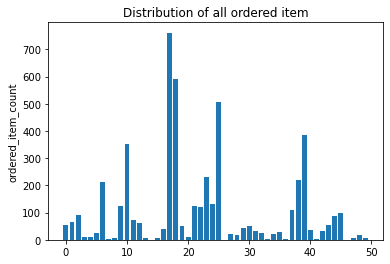

In [12]:
# 시각화
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_n_list = item_quantt.index.tolist()
x_pos = np.arange(len(item_n_list))
order_cnt = item_quantt.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

In [13]:
item_quantt.index
item_quantt.values

array([ 55,  66,  91,  12,  10,  25, 211,   4,   6, 126, 351,  71,  60,
         8,   1,   6,  40, 761, 591,  50,   9, 123, 120, 230, 130, 506,
         1,  23,  18,  45,  50,  33,  25,   2,  20,  29,   2, 110, 221,
       386,  36,   4,  31,  56,  87,  97,   1,   6,  18,   8], dtype=int64)

---

### 탐색적 분석 : 깊이있는 질문 통해 데이터 탐색
- 주문당 평균 계산금액 출력
- 한 주문에 10달러 이상 사용한 주문의 id 출력
- 각 메뉴의 가격 출력
- 가장 비싼 주문에서 메뉴가 몇 개 팔렸는지 
- 'Veggie Salad Bowl'의 주문 횟수
- 'Chicken Bowl'을 2개 이상 주문한 횟수

In [14]:
# 주문당 평균 계산금액 출력
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [15]:
chipo.groupby('order_id')['item_price'].sum().describe()

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

In [16]:
# 한 주문에 10달러 이상 사용한 주문의 id 출력
order_10_dol = chipo.groupby('order_id').sum()
order_10_dol[order_10_dol.item_price >= 10]

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [17]:
# 각 메뉴의 가격 출력
chipo_1_item = chipo[chipo.quantity == 1]  # 주문수량이 1인 메뉴
chipo_1_item_p = chipo_1_item.groupby('item_name').min()  # 메뉴별 가장 낮은 가격(토핑이 있어 메뉴 가격을 정확히 알 수 없음)
chipo_1_item_p.head()

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,1076,1,[Coke],6.49
Barbacoa Bowl,1000,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",8.69
Barbacoa Burrito,1002,1,"[Fresh Tomato (Mild), [Black Beans, Rice, Sour...",8.69
Barbacoa Crispy Tacos,110,1,"[Fresh Tomato Salsa, Guacamole]",8.99
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39


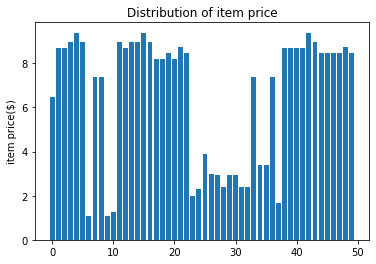

In [18]:
# 아이템 가격 분포 그래프
name_list = chipo_1_item_p.index.tolist()
x_pos = np.arange(len(name_list))
item_price = chipo_1_item_p['item_price'].tolist()

plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')

plt.show()

In [25]:
# 가장 비싼 주문에서 메뉴가 몇 개 팔렸는지

# item_price의 합이 가장 높은 order_id를 구함(= 926번 주문)
chipo.groupby('order_id')['item_price'].sum().sort_values(ascending=False)
# order_id = 926 count
chipo[chipo['order_id'] == '926'].count()

# 정답
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:1]

,quantity,item_price
order_id,,
926,23,205.25


In [43]:
# 'Veggie Salad Bowl'의 주문 횟수
print(len(chipo[chipo['item_name'] == 'Veggie Salad Bowl']))
vsb = chipo.groupby('item_name').sum()
print(vsb[vsb.index == 'Veggie Salad Bowl'])

# 정답 = 한 주문 내에서 중복 집계된 item_name을 제거
vsb_dupli = chipo[chipo['item_name'] == 'Veggie Salad Bowl']
vsb_dupli = vsb_dupli.drop_duplicates(['item_name', 'order_id'])
print(len(vsb_dupli))

18
                   quantity  item_price
item_name                              
Veggie Salad Bowl        18       182.5
18


In [78]:
# 'Chicken Bowl'을 2개 이상 주문한 횟수

# 'Chicken Bowl'의 'quantity'가 2 이상
chi_bo = chipo[chipo['item_name'] == 'Chicken Bowl']
print('Chicken Bowl의 quantity가 2 이상 : ', len(chi_bo[chi_bo['quantity'] >= 2]))

# Chicken Bowl'을 주문한 'order_id'가 2개 이상
chi_bo_ordersum = chi_bo.groupby('order_id').sum()['quantity']
chi_bo_ordersum = chi_bo_ordersum[chi_bo_ordersum >= 2]
print('Chicken Bowl을 주문한 order_id가 2개 이상 : ', len(chi_bo_ordersum))

Chicken Bowl의 quantity가 2 이상 :  33
Chicken Bowl을 주문한 order_id가 2개 이상 :  114


가장 인기있는 메뉴 :  Chicken Bowl 

주문된 메뉴 종류 :  50 

top10 주문메뉴 : 
 item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64 

주문당 평균 계산금액 : 
 count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64 

각 메뉴의 대략적인 가격 : 
 count    50.000000
mean      6.572200
std       2.947196
min       1.090000
25%       3.097500
50%       8.490000
75%       8.690000
max       9.390000
Name: item_price, dtype: float64


(array([ 4.,  5.,  6.,  1.,  0.,  0.,  1.,  4., 10., 19.]),
 array([1.09, 1.92, 2.75, 3.58, 4.41, 5.24, 6.07, 6.9 , 7.73, 8.56, 9.39]),
 <BarContainer object of 10 artists>)

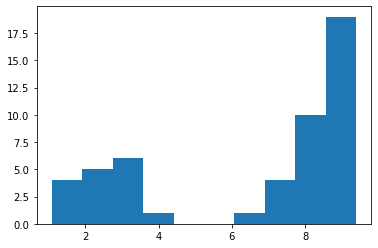

In [190]:
# 인사이트 정리
print('가장 인기있는 메뉴 : ', chipo.groupby('item_name').sum().sort_values(by='quantity', ascending=False)[:1].index[0],'\n')
print('주문된 메뉴 종류 : ', len(chipo.groupby('item_name').sum()),'\n')
print('top10 주문메뉴 : \n', chipo.groupby('item_name').sum().sort_values(by='quantity', ascending=False)[:10]['quantity'],'\n')
print('주문당 평균 계산금액 : \n', chipo.groupby('order_id')['item_price'].sum().describe(),'\n')
print('각 메뉴의 대략적인 가격 : \n', chipo[chipo['quantity'] == 1].groupby('item_name').min()['item_price'].describe())
plt.hist(chipo[chipo['quantity'] == 1].groupby('item_name').min()['item_price'])

- 주문당 평균 계산금액 : 평균 약 18, 표준편차 11, 25%~75%구간 12 ~ 21, 최대값 205, 대부분 주문이 평균 계산금액, 표준편차는 보정값 필요
- 메뉴의 대략적인 가격 : 대부분 2-4, 6-8 달러에 형성되어 있음

---

# 전세계 음주 데이터 분석하기

- [탐색 : 데이터의 기본 정보 탐색](#탐색2-:-데이터의-기본-정보-탐색)
- [인사이트 발견 : 탐색, 시각화](#인사이트-발견2-:-탐색,-시각화)
- [탐색적 분석 : 깊이있는 질문 통해 데이터 탐색](#탐색적-분석2-:-깊이있는-질문-통해-데이터-탐색)
- [통계적 분석 : 분석 대상간의 통계적 차이 검정하기](#통계적-분석-:-분석-대상간의-통계적-차이-검정하기)
- [대한민국은 얼마나 술을 독하게 마시는 나라일까?](#대한민국은-얼마나-술을-독하게-마시는-나라일까?)
- [1장 연습 문제](#1장-연습-문제)

### 탐색2 : 데이터의 기본 정보 탐색

In [192]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../python_data_analysis_master/data/drinks.csv'
drinks = pd.read_csv(file_path)

In [193]:
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


- 총 193개의 데이터
- country, continent 제외한 나머지는 수치형 데이터
- continent는 23개의 결측값 존재

In [194]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [195]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


---

### 인사이트 발견2 : 탐색, 시각화
- 피처간의 상관관계 탐색

In [205]:
# 두 피처간의 상관계수
corr = drinks[['beer_servings', 'wine_servings']].corr(method='pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [206]:
# 여러 피처간의 상관계수
corr = drinks[drinks.columns].corr(method='pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


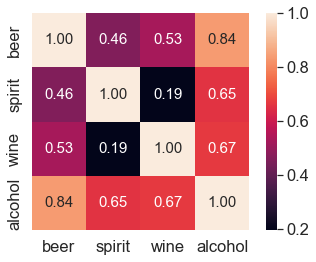

In [226]:
import seaborn as sns

# corr 행렬 히트맵 시각화
cols = ['beer','spirit','wine','alcohol']
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                cbar=True,    # color bar
                annot=True,   # 숫자표시
                square=True,  # 정사각형
                fmt='.2f',
                annot_kws={'size':15},   # 표시된 숫자크기
                yticklabels=cols,
                xticklabels=cols)
plt.show()

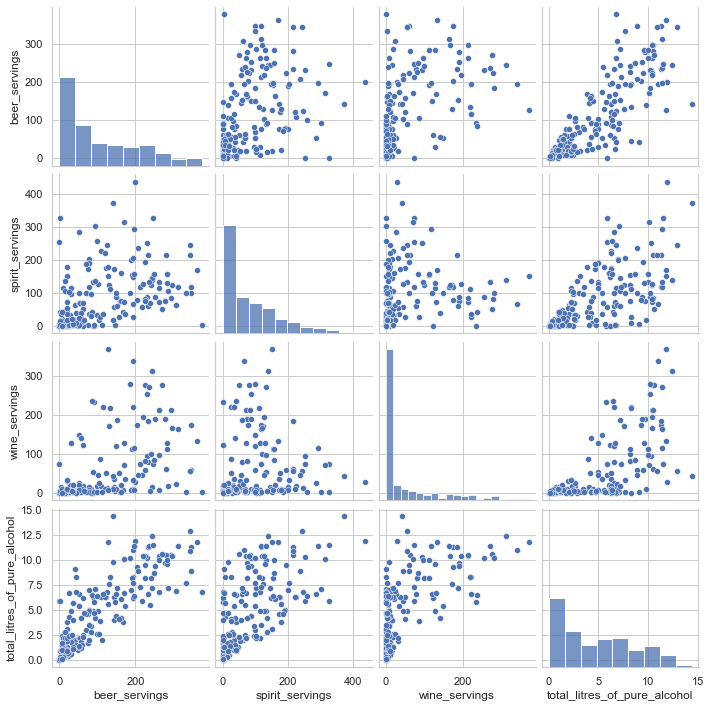

In [227]:
# 피처 간 산점도
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(drinks[drinks.columns], height=2.5)
plt.show()

---

### 탐색적 분석2 : 깊이있는 질문 통해 데이터 탐색

In [230]:
# 결측데이터 확인
drinks.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [228]:
# 결측데이터 전처리
drinks['continent'] = drinks['continent'].fillna('OT') # Others
drinks[:10]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


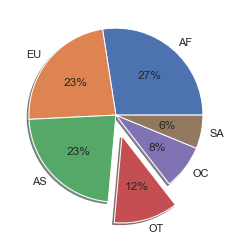

In [242]:
# 전체 데이터에서 OT 비율을 파이차트로 시각화
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.show()

In [251]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계 계산**********************************agg()사용************************************
coun_sp_serv = drinks.groupby('continent')['spirit_servings']
coun_sp_serv.mean()
coun_sp_serv.min()
coun_sp_serv.max()
coun_sp_serv.sum()

# 정답
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [255]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙
total_mean = drinks.total_litres_of_pure_alcohol.mean()
conti_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
conti_over_mean = conti_mean[conti_mean > total_mean]
conti_over_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [267]:
# 평균 beer_servings이 가장 높은 대륙 (***********************************idxmax()사용***************************************)
drinks.groupby('continent').beer_servings.mean().sort_values()[-1:]

# 정답
drinks.groupby('continent').beer_servings.mean().idxmax()

'EU'

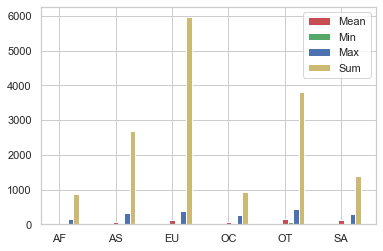

In [268]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계 시각화
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

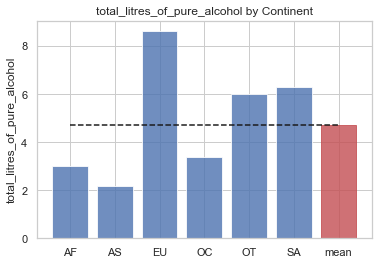

In [279]:
# 대륙별 알코올 섭취 시각화
contins = conti_mean.index.tolist()
contins.append('mean')
x_pos = np.arange(len(contins))
alcohol = conti_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.8)   # alpha : 투명도
bar_list[len(contins) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, contins)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

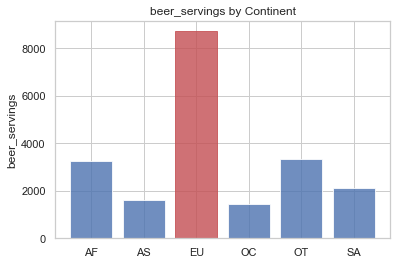

In [286]:
# 대륙별 beer_servings 시각화
beer_group = drinks.groupby('continent')['beer_servings'].sum()
contins = beer_group.index.tolist()
y_pos = np.arange(len(contins))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.8)
bar_list[contins.index("EU")].set_color('r')
plt.xticks(y_pos, contins)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')

plt.show()

### 통계적 분석 : 분석 대상간의 통계적 차이 검정하기
- t-test : 모집단의 평균 등과 같이 실제 정보를 모를 때 현재의 데이터만으로 두 집단의 차이에 대해 검정할 수 있는 방법. 단, 두 데이터의 개수가 비슷하면서 정규 분포를 보이는 경우에 신뢰도가 높음

In [295]:
# 아프리카와 유럽간의 맥주 소비량 차이 검정

from scipy import stats


africa = drinks[drinks['continent'] == 'AF']
europe = drinks.loc[drinks['continent']=='EU']

tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


- t-test의 귀무가설 : 두 집단의 평균은 같다
- p-value = 0, 귀무가설은 기각
- 따라서 '아프리카와 유럽 대륙간의 맥주 소비량 차이'는 통계적으로 유의미하다(두 집단의 평균이 다르다)
- 하지만 두 데이터의 크기가 다르고, 각각의 크기 또한 크지 않기에 실제로 통계적인 의미를 가지는 검정이라고 보기엔 어려움

### 대한민국은 얼마나 술을 독하게 마시는 나라일까?

In [296]:
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

In [300]:
# 술 소비량 대비 알콜 비율 피처 생성
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'].isnull().sum()

13

In [301]:
# 알콜 비율 피처의 결측값을 0으로 채움
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)
drinks['alcohol_rate'].isnull().sum()

0

In [309]:
# 순위 정보
country_rank = drinks[['country', 'alcohol_rate']]
country_rank = country_rank.sort_values(by='alcohol_rate', ascending=False)
country_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


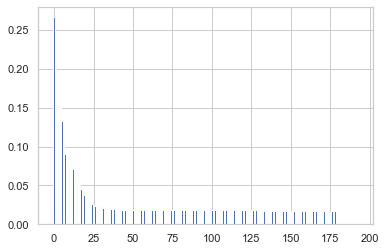

In [310]:
# 순위 정보 시각화
country_list = country_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)

(0.0, 200.0, 0.0, 0.3)

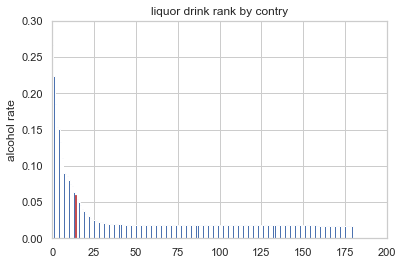

In [317]:
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

In [323]:
korea_rank = country_list.index("South Korea")
korea_alc_rate = country_rank[country_rank['country'] == 'South Korea']['alcohol_rate'].values[0]

0.0593939393939394

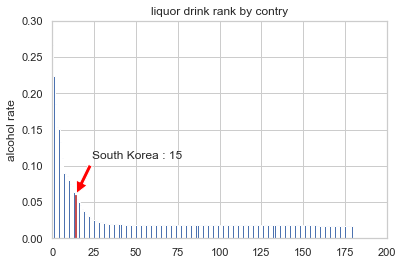

In [326]:
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

### 1장 연습 문제
- total_servings : beer_servings, spirit_servings, wine_servings의 합을 통해 실질적인 소비량을 계산
- alcohol_rate : 소비량 대비 알콜 비율을 계산
- alcohol_rate_rank, alcohol_rate_continent 등으로 응용.

In [37]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../python_data_analysis_master/data/drinks.csv'
drinks = pd.read_csv(file_path)
drinks['continent'] = drinks['continent'].fillna('OT')

### [대륙별 평균 wine_servings 탐색]

In [38]:
drinks.groupby('continent').wine_servings.mean()

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
OT     24.521739
SA     62.416667
Name: wine_servings, dtype: float64

In [39]:
df = drinks.groupby('continent').mean()['wine_servings']
df = df.to_frame().reset_index()
df = df.rename(columns={'wine_servings': 'wine_servings_cont_avg'})
drinks = pd.merge(drinks, df, on='continent', how='outer')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,wine_servings_cont_avg
0,Afghanistan,0,0,0,0.0,AS,9.068182
1,Bahrain,42,63,7,2.0,AS,9.068182
2,Bangladesh,0,0,0,0.0,AS,9.068182
3,Bhutan,23,0,0,0.4,AS,9.068182
4,Brunei,31,2,1,0.6,AS,9.068182
...,...,...,...,...,...,...,...
188,Samoa,105,18,24,2.6,OC,35.625000
189,Solomon Islands,56,11,1,1.2,OC,35.625000
190,Tonga,36,21,5,1.1,OC,35.625000
191,Tuvalu,6,41,9,1.0,OC,35.625000


In [40]:
drinks[['country', 'continent', 'wine_servings_cont_avg']].sample(5).head()

,country,continent,wine_servings_cont_avg
18,Laos,AS,9.068182
174,Suriname,SA,62.416667
151,El Salvador,OT,24.521739
185,Niue,OC,35.625000
6,China,AS,9.068182


In [ ]:
# 위와 같은 방법의 코드
drinks['wine_servings_cont_avg'] = drinks.groupby('continent')['wine_servings'].transform(np.mean)

##### 대륙별 평균 wine_servings 피처 생성 

- groupby 연산 결과를 반환하면, 반환 데이터의 타입은 dataframe 타입이 아닙니다. 따라서 to_frame이라는 함수를 사용하여 dataframe 타입으로 변환한 뒤, 다시 이 dataframe의 index를 reset_index라는 함수로 설정하는 과정이 필요합니다. 그리고 이 과정으로 생성된 dataframe을 원래의 dataframe에 합쳐주어야 합니다. 이를 위해서는 merge 라는 함수를 또 새롭게 적용해야 하지요. 하지만 transform 함수가 있다면, 이 모든 과정을 단 한줄의 코드로 수행할 수 있습니다.


---

### [국가별 total_servings 피처 생성]

In [69]:
df = drinks.groupby('country').sum()
total_serv = df['beer_servings'] + df['spirit_servings'] + df['wine_servings']
total_serv = total_serv.to_frame().reset_index().rename(columns={0:'total_serv'})
coun_total_serv = pd.merge(drinks, total_serv, on='country', how='outer')

In [98]:
coun_total_serv[['country','beer_servings','spirit_servings','wine_servings','total_serv']].sample(5)

,country,beer_servings,spirit_servings,wine_servings,total_serv
14,Jordan,6,21,1,28
82,Slovenia,270,51,276,597
106,Eritrea,18,0,0,18
40,United Arab Emirates,16,135,5,156
165,Argentina,193,25,221,439


In [141]:
# 국가별 total_servings 피처를 만들어서 병합합니다.
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']
# 결과를 출력합니다.
drinks[['country', 'beer_servings', 'wine_servings', 'spirit_servings', 'total_servings']].sample(5).head()

,country,beer_servings,wine_servings,spirit_servings,total_servings
80,Serbia,283,127,131,541
21,Maldives,0,0,0,0
67,Latvia,281,62,216,559
75,Poland,343,56,215,614
189,Solomon Islands,56,1,11,68


##### 국가별 total_servings 피처 생성 
- group 단위 연산이 아닌, 일반 연산의 경우 간단한 사칙연산 기호만으로 피처를 재구성 할 수 있습니다. drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings'] 처럼 간단한 코드로도, 합계를 계산한 새로운 피처를 만들어 낼 수 있습니다.

---

### [전체 평균보다 적은 알코올을 섭취하는 대륙 중에서, spirit을 가장 많이 마시는 국가 구하기]

In [136]:
# 전체 평균
total_mean = drinks['total_litres_of_pure_alcohol'].mean()
# 보다 적은 알코올 섭취 대륙
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
conti_under_mean = continent_mean[continent_mean <= total_mean].index.tolist()
df_conti_under_mean = drinks.loc[drinks.continent.isin(conti_under_mean)]
# spirit을 가장 많이 마시는 국가
df_conti_under_mean[['country', 'spirit_servings']].sort_values('spirit_servings', ascending=False).head(1)

,country,spirit_servings
30,Russian Federation,326


In [138]:
# 정답
most_spirit_under_mean = df_conti_under_mean.loc[df_conti_under_mean['spirit_servings'].idxmax()]
most_spirit_under_mean['country']

'Russian Federation'

##### 전체 평균보다 적은 알코올을 섭취하는 대륙 중에서, spirit을 가장 많이 마시는 국가
- group 단위 연산을 적용한 결과를 바탕으로, 원하는 조건을 필터링합니다. 여기에 isin 함수와 dataframe.loc 을 이용하여 전체 평균보다 적은 알코올을 섭취하는 대륙들을 구할 수 있습니다. isin 함수의 사용법을 조금 더 설명하자면, 만약 A[A.column_name.isin(B)] 라는 코드가 있다면, 이것은 A라는 데이터 프레임 중, A의 column_name 피처가 B 안에 포함되어 있는 데이터만을 가져온다는 것입니다. 그리고 loc이라는 것은 반환된 데이터의 위치를 나타내는 것입니다. 이제 이 결과에 idxmax() 함수를 사용하면, 특정 value가 가장 높은 데이터의 index를 찾을 수 있습니다. 이 부분의 코드블럭을 잘게 나누어, 한 줄 한 줄 실행해보며 함수의 사용법을 잘 파악해보도록 합시다.

---

### [술 소비량 대비 알콜 비율 구하기]

In [162]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,wine_servings_cont_avg,total_servings,alcohol_rate,alcoh_rate_rank
0,Afghanistan,0,0,0,0.0,AS,9.068182,0,0.000000,187.0
1,Bahrain,42,63,7,2.0,AS,9.068182,112,0.017857,106.0
2,Bangladesh,0,0,0,0.0,AS,9.068182,0,0.000000,187.0
3,Bhutan,23,0,0,0.4,AS,9.068182,23,0.017391,174.0
4,Brunei,31,2,1,0.6,AS,9.068182,34,0.017647,162.0


In [145]:
# 술 소비량 대비 알콜 비율
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

<ufunc 'floor'>

In [163]:
# 전체 중 한국 순위
# 전체 랭킹 컬럼 생성
drinks['alcoh_rate_rank'] = drinks['alcohol_rate'].rank(ascending=False).apply(np.floor)
drinks.loc[drinks['country'] == 'South Korea']['alcoh_rate_rank']

29    15.0
Name: alcoh_rate_rank, dtype: float64

##### 술 소비량 대비 알콜 비율에 대한 피처 생성
- 위의 다른 예제들과 동일한 방법을 통해 새로 만들어진 'alcohol_rate' 피처를 기준으로 rank 함수를 적용합니다. 이를 통해 한국(South Korea)이 술 소비량 대비 알콜 비율이 전체 순위 중 몇위인지 찾아봅시다. rank 함수는 특정 column 내에서의 순위값을 반환해주는 함수입니다. 실행 결과, 자랑스럽게도 한국의 술 소비량 대비 알콜 비율은 전체에서 15등을 차지하였습니다.

---

### [대륙별 술 소비량 대비 알콜 비율 구하기]

In [171]:
# 대륙별 술 소비량
conti_sum = drinks.groupby('continent').sum()
conti_sum['alcohol_rate_conti'] = conti_sum['total_litres_of_pure_alcohol'] / conti_sum['total_servings']
conti_sum = conti_sum.reset_index()
conti_sum = conti_sum[['continent', 'alcohol_rate_conti']]
drinks = pd.merge(drinks, conti_sum, on='continent', how='outer')

In [173]:
# 결과
drinks[['country', 'continent', 'alcohol_rate_conti']].sample(5).head()

,country,continent,alcohol_rate_conti
169,Colombia,SA,0.017909
103,Djibouti,AF,0.031970
175,Uruguay,SA,0.017909
36,Thailand,AS,0.020293
154,Haiti,OT,0.017860


##### 대륙별 술 소비량 대비 알콜 비율 피처 생성
- 대륙별 술 소비량 대비 알콜 비율이라는 또 다른 피처를 재구성하였습니다. 이 피처는 위의 예제들의 모든 함수를 골고루 사용하여 생성된 피처입니다. 만약 여러분이 이러한 피처를 자유자재로 생성할 수 있다면, 파이썬을 활용한 데이터 처리 그리고 탐색적 데이터 분석을 어느정도 능숙하게 할 수 있게 된 것입니다.